In [1]:
import numpy
import scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as pyplot
import matplotlib
import statsmodels.api as statsmodels
import statsmodels.formula.api as formula
import patsy
import seaborn
from lib import stats, database, constants, utils, plotting
%matplotlib inline
seaborn.set_style('whitegrid')

## Prepare Data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston

{'DESCR': "Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  

In [53]:
X = boston['data']

In [54]:
names = boston['feature_names']

In [55]:
y = boston['target']

## Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf = RandomForestRegressor(n_estimators = 50, oob_score=True, max_features='auto')

In [9]:
import sklearn

In [11]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, train_size=0.7, random_state=1)

In [14]:
forest = rf.fit(X_train, y_train)

In [15]:
y_predict = forest.predict(X_test)

In [16]:
y_predict

array([ 28.802,  26.84 ,  19.73 ,  20.692,  20.324,  19.876,  27.506,
        19.048,  20.558,  23.01 ,  27.184,  32.322,  20.376,  20.624,
        20.304,  24.236,  11.364,  41.008,  23.396,  13.802,  19.948,
        16.79 ,  23.916,  23.87 ,  26.04 ,   9.076,  14.334,  19.978,
        42.04 ,  12.614,  27.152,  19.616,  47.486,  16.198,  23.472,
        21.228,  15.362,  33.266,  13.574,  19.61 ,  25.27 ,  23.332,
        25.678,  15.226,  15.08 ,  11.894,  48.812,  11.462,  21.074,
        18.706,  23.854,  21.376,  25.112,  20.95 ,  10.082,  24.006,
        11.56 ,  23.722,  18.32 ,  42.462,  14.188,  26.632,  13.496,
        15.184,  17.678,  33.806,  41.656,  24.846,  21.716,  20.752,
        24.018,   7.022,  18.192,  21.612,  19.402,  20.83 ,  45.156,
        24.402,  28.282,  34.28 ,  17.088,  20.634,  32.61 ,  12.072,
        25.084,  25.604,  14.688,  24.496,  19.998,  16.978,  30.236,
        43.416,  14.896,  21.178,  15.336,  20.568,  23.586,  22.946,
        42.572,  20.

In [17]:
r2 = sklearn.metrics.r2_score(y_test, y_predict)

In [18]:
mse = numpy.mean((y_test-y_predict)**2)

In [20]:
print r2, mse, forest.oob_score_

0.912571241699 8.013238 0.848830343681


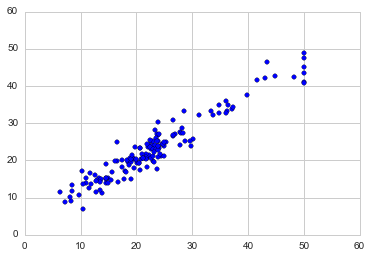

In [25]:
pyplot.scatter(y_test, y_predict)

## Random Forest Feature Importance

In [30]:
# by feature importance (done i think by gini impurity for classification and variance for regression)
sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), names), reverse=True)

[(0.5339, 'LSTAT'),
 (0.2522, 'RM'),
 (0.0678, 'DIS'),
 (0.034, 'CRIM'),
 (0.0293, 'NOX'),
 (0.0268, 'AGE'),
 (0.0163, 'PTRATIO'),
 (0.013, 'B'),
 (0.0123, 'TAX'),
 (0.0078, 'INDUS'),
 (0.0051, 'RAD'),
 (0.0008, 'ZN'),
 (0.0008, 'CHAS')]

## Linear Regression

In [52]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [58]:
X_df = pd.DataFrame(X, columns=names)

In [61]:
X_df = sm.add_constant(X_df)

In [68]:
y_df = pd.DataFrame(y, columns=['PRICE'])

In [77]:
data_df = pd.concat([X_df, y_df], axis=1)

In [62]:
model = sm.OLS(y, X_df)

In [63]:
results = model.fit()

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     105.0
Date:                Mon, 04 Jul 2016   Prob (F-statistic):          1.15e-132
Time:                        12:26:42   Log-Likelihood:                -1504.1
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     492   BIC:                             3095.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         35.3099      5.148      6.858      0.000        25.194    45.425
CRIM           0.0140      0.025      0.558      0.577        -0.035     0.063
ZN             0.0423      0.014      3.056      0.002         0.015     0.069
INDUS          0.0266      0.062      0.427      0.669        -0.096     0.149
CHAS           2.8302      0.870      3.254      0.001         1.122     4.539
NOX          -16.9538      3.855     -4.398      0.000       -24.528    -9.379
RM             3.8408      0.422      9.095      0.000         3.011     4.671
AGE            0.0011      0.013      0.080      0.936        -0.025     0.027
DIS           -1.3998      0.200     -6.992      0.000        -1.793    -1.006
RAD            0.2485      0.065      3.845      0.000         0.122     0.375
TAX           -0.0122      0.004     -3.210      0.001        -0.020    -0.005
PTRATIO       -0.9429      0.132     -7.133      0.000        -1.203    -0.683
B              0.0104      0.003      3.844      0.000         0.005     0.016
LSTAT         -0.5519      0.051    -10.877      0.000        -0.652    -0.452
==============================================================================
Omnibus:                      171.311   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.671
Skew:                           1.451   Prob(JB):                    2.44e-166
Kurtosis:                       8.268   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
import statsmodels.formula.api as smf

In [81]:
model = smf.ols(formula="PRICE ~ LSTAT + RM", data=data_df)

In [82]:
results = model.fit()

In [83]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 04 Jul 2016   Prob (F-statistic):          7.01e-112
Time:                        12:43:46   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669        -7.592     4.875
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
RM             5.0948      0.444     11.463      0.000         4.222     5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""